In [43]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## Linear Regression

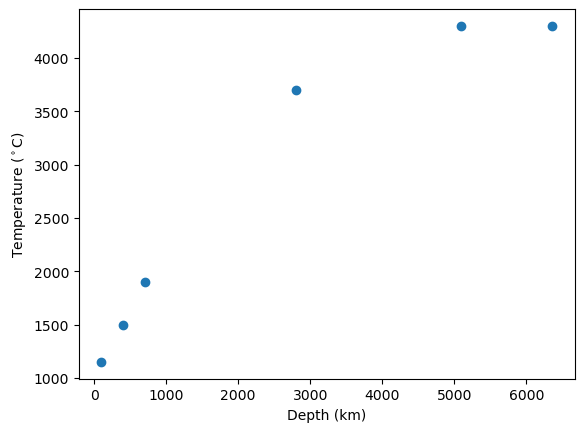

In [10]:
#We will import data of geophysically determined temperatures as a function of depth 
# beneath Earth's surface
#  This data comes from pg. 25 of Waltham
data = pd.read_csv('temperature-depth.txt', delimiter='\t')#we have a tab delimiter
depth = data['Depth(km)'] #first column is depth
temp = data['Temp(C)'] #2nd column is temperature
plot(depth, temp, 'o')
xlabel('Depth (km)')
ylabel('Temperature ($^\circ$C)')
show()

In [4]:
#First we have to import the linregress function so that it is available to us.
from scipy.stats import linregress
#To calculate a linear regression we provide the x (depth) and y (temp) data values to 
# linregress() like this
slope, intercept, r, p, stderr = linregress(depth, temp)
#There are several values returned by linregress() as listed above.  
# - slope and intercept are the slope and intercept of the best-fitting line.  
# - r, is a measure of goodness-of-fit. The closer it is to 1 the better the fit.
# -  p is the probability that the given data could have been produced by a population that
#     actually had a slope of zero.  It is a measure of statistical confidence in the result.
#     Lower p values mean higher confidence.  Generally, p values < 0.05 are considered 
#     statistically significant.
# - stderr is the estimate of the standard deviation of the errors between the model and data.

In [5]:
#Print out information about the fit
print('Slope =', slope)
print('Intercept =', intercept)
print('R^2 =', r**2.)
print('p =', p)
print('stderr =', stderr)

Slope = 0.5200430850407598
Intercept = 1468.3556508783092
R^2 = 0.901929216144513
p = 0.003731570915239229
stderr = 0.08574186503967773


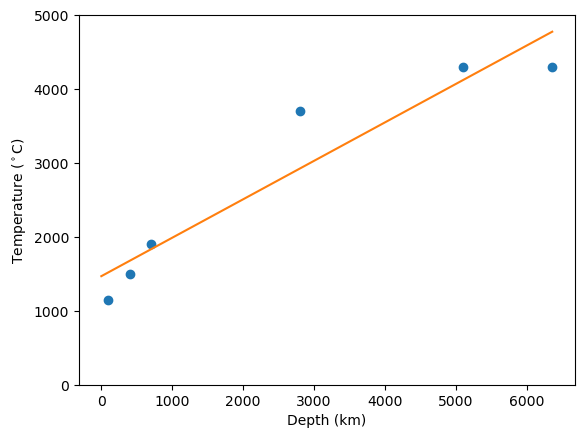

In [11]:
#Let's plot the result of our regression against the data
plot(depth, temp, 'o')

# These are the depth values we're going to use to model Temp vs. Depth
# When plotting regression models these "x" values should be some reasonable range for your problem.
# We only need two points, since we are plotting a straight line. 
# For a curve, we would need more x points in the array.
depth_model = array([0.,max(depth)])
#The equation below calculates the best fit temp values as a function of depth
#using slope and intercept values from the regression above
temp_model = slope*depth_model+intercept
plot(depth_model, temp_model)
xlabel('Depth (km)')
ylabel('Temperature ($^\circ$C)')
ylim([0,5000])
show()

### How could we fit a line to just the first four points of the data? Try this!

## Polynomial Regression

In [12]:
#We can fit polynomials to data in python using a function called numpy.polyfit()
#  The first two arguments are the x and y data, and the third argument is the
#  degree of the polynomial to fit to the data.  The degree is the highest power
#  of x that appears in the polynomial equation.
# For degree 4 the polynomial would be y = ax^4 + bx^3 + cx^2 + dx + e
coefficients = polyfit(depth, temp, 4)
#polyfit() will return an array containing the coefficients of the polynomial (a,b,c,d,e in this case)

In [13]:
coefficients

array([ 1.77098278e-12, -1.50908418e-08, -1.03583130e-04,  1.33114874e+00,
        1.00857314e+03])

In [14]:
#The poly1d() function can be used to create polynomial function objects like this the these coefficients
poly_model = poly1d(coefficients)
#poly_model() is now a function that will calculate the y value of the polynomial for a given x.
#While you could write out the polynomial equation by hand, as shown above, using poly1d is way easier.
print(poly_model(depth))  #This line of code calculates the model temperatures for each depth value

[1140.63726702 1523.53885727 1884.87057799 3701.27823619 4299.52470382
 4300.1503577 ]


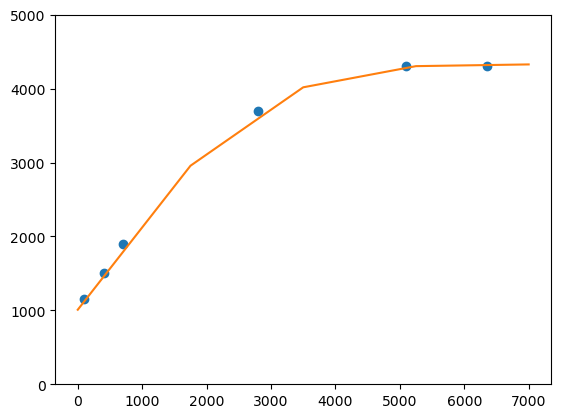

In [33]:
#We can plot the model against the data like this
plot(depth, temp, 'o')#This just plots the data points
#This next line creates a set of depth values for which we will calculate temperature using the polynomial fit.
#Note that we now use more than 2 points, because it is not a straight line. We start with 5.
depth_model = linspace(0, 7000, 5)
#Now plot the curve over the data
plot(depth_model, poly_model(depth_model))
ylim([0,5000])
# Add appropriate axis labels


show()

#This model would look better (smoother) if we used more x values in plotting it
#  Change the code to increase the number of x values 

C:\Users\rstrickland\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


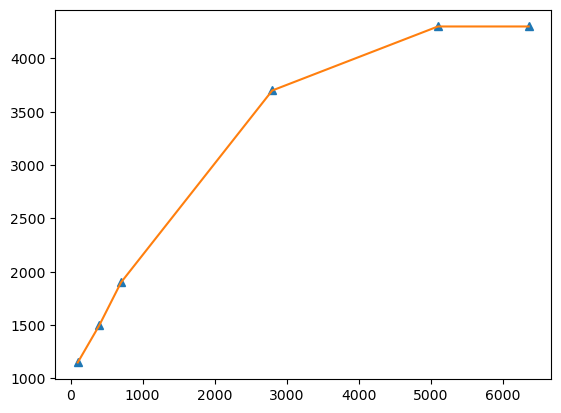

In [34]:
#If we dramatically increase the order of the polynomial, we can fit the data really well...but it is overfit.
coefficients = polyfit(depth, temp, 10)#we're using a 14th order polynomial
overfit_model = poly1d(coefficients)
plot(depth, temp, '^')
overfit_depths = depth
plot(overfit_depths, overfit_model(overfit_depths))
#This code only plots our polynomial at the locations of our depth data

#looks good doesn't it?

#Instead of plotting the model only at the data points, what happens if you use linspace (as done above)
# to plot a nice smooth curve that displays the model between the data points as well? Be sure you use 
# enough points in your linspace array to show a smooth function (perhaps 100 or more).

#See any problems with the way the model behaves betwen the data points?

#Note, when you run this code, python actually warns you that you may have overfit your data.
# This is what it means when it says "may be poorly conditioned."



## Regressions with Any Function

In [35]:
# This is some function y = f(x), here we named it func()
# Here we define our function to be: y = c - a*e^(-x/b)
# Notice that a, b, and c are all parameters of func() and x is an independent variable.
def func(x, a, b, c):
    y = c - a*exp(-x/b) 
    return y

In [36]:
# This calls the func with x = 1., a = 2., b = 2., and c = 3 and returns the y value.
func(1., 2., 2., 3.)

1.7869386805747332

In [37]:
#We can do curve fitting of any type of function using scipy.optimize.curve_fit()
from scipy.optimize import curve_fit

#We call curve_fit with our function name as the first argument 
# and our x and y data as the next two arguments
# p0 is an initial guess for the parameters, in this case for a, b, and c
opt_params, pcov = curve_fit(func, depth, temp, p0=[3000., 100.,4000.])
#The function returns a list of optimal parameters and the estimated covariance of the parameters
#How might we estimate those parameters for our temp data? why did I chose the initial guess values I used?
#Sometimes the initial guess is important, and the computer might not find the correct solution 
#unless we start it out in the right neighborhood.
print(opt_params)

[3630.93807861 1979.5197503  4520.47556432]


In [39]:
# We can then calculate the best-fit curve using the optimized parameters for a, b, and c
#First we create a dummy x variable that contains locations where we want to calculate the
#fitting curve y values.
depth_model = linspace(0,7000,500)
# Assign the optimized parameters to their appropriate variables
# look at the format of opt_params above
a_opt = opt_params[0]
b_opt = opt_params[1]
c_opt = opt_params[2]
#This will be the y values of the model using the optimal parameters determined by curve_fit
temp_model = func(depth_model, a_opt, b_opt, c_opt)

# Create a plot of the model and the temp/depth data 

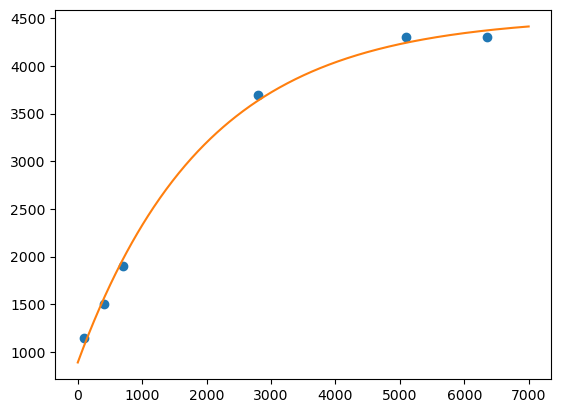

In [41]:
plot(depth, temp, 'o')
plot(depth_model, temp_model)

## Plotting and Fitting Curves in Logarithmic Space

### When the range of your data spans several orders of magnitude (powers of ten), you should consider plotting in logarithmic space. River discharge, earthquake energy, sizes of lakes, city populations, website visits, and personal finanical wealth are some examples of measurements that tend to vary by many orders of magnitude. These should be plotted in logarithmic space. 

### Fitting curves in log space is preferred when we have data that range over many orders of magnitude and the error (or range of residuals around best fit line) scales roughly with the order of magnitude of the measurement.  If error is a constant value, or if the range of residuals does not change with the independent variable, a log fit is not appropriate. 

### Most of the times when we have data that range over several orders of magnitude, we will be in a situation where errors are also bigger on the bigger data points. Therefore, we typically want to fit such data in log space.

In [44]:
#Let's import some data that examines the areas and perimeters of topographic depressions on the Ngozumpa Glacier. 
#Topographic depressions are "pits" in the topography where ponds sometimes form. 

df = pd.read_csv('2019-ngozumpa-depressions.csv')
df

,area,perimeter
0,21,40
1,10,22
2,56,56
3,193,114
4,672,216
...,...,...
31319,211,130
31320,181,76
31321,461,168
31322,282,146


In [45]:
#We can use pandas to look at the basic statistics of the perimeters and areas
df['area'].describe()

count     31324.000000
mean         63.447069
std        2319.680208
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max      251241.000000
Name: area, dtype: float64

In [46]:
df['perimeter'].describe()

count    31324.000000
mean        13.547025
std        140.879211
min          4.000000
25%          4.000000
50%          4.000000
75%          8.000000
max      18793.000000
Name: perimeter, dtype: float64

### The areas range from 1-251241 m^2 (5 orders of magnitude) and the perimeters range from 4-18793 m (4 orders of magnitude)

Text(0, 0.5, 'Perimeter')

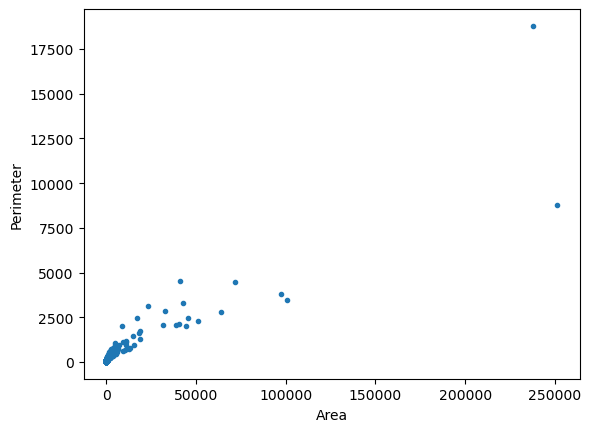

In [48]:
#Let's see what the plot of area vs. perimeter would look like in linear space
area = df['area']
perimeter = df['perimeter']

plot(area, perimeter, '.')
xlabel('Area')
ylabel('Perimeter')
show()

#The plot doesn't look terrible, but notice that almost all of our data is clustered in the bottom
#corner of the plot. This is not good.

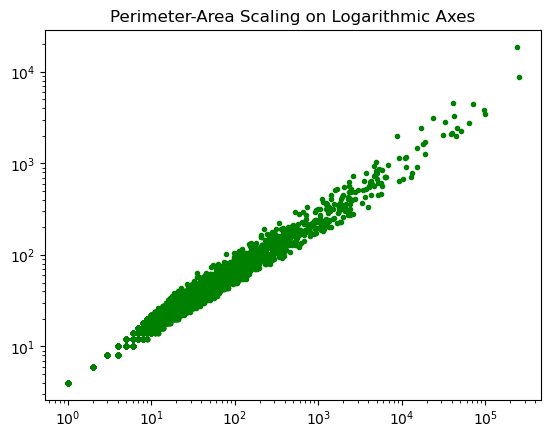

In [55]:
#Let's now try plotting on logarithmically scaled axes. We will use a new plotting function to do this

loglog(area, perimeter, '.', color = 'green')
#Add axis labels to the plot

title('Perimeter-Area Scaling on Logarithmic Axes')
show()

### Adding Best Fit Curves in logarithmic space

#### Points that plot linearly in log-log space, like the perimeter-area plot above, describe "Power Laws". These types of relationships occur commonly and are interesting because they describe scaling relationships. A simple geometric example of a power law is the relationship between the volume of a sphere and its radius. As you increase the radius of the sphere, the volume increase scales with the cube of the radius: $ V = \frac{4}{3}\pi r^3 $

Finding the scaling relationship between values that plot linearly in log-log space is straightforward, but it does require that you remember some algebra:

Consider the perimeter-area plot above. Because it plots as a line in log-log space, we can write the equation for that line as:
$$
\log{y} = m \log{x} + b
$$
The slope, $m$, is the exponent of interest in our scaling relationship. We can find the full power law equation if we remember the rules for logarithms:
$$
10^{\log{y}} = 10^{m \log{x} + b} \\
y = 10^{\log{x^m}}10^b \\
y = 10^bx^m \\
y = Ax^m
$$
In the last step, I created a new variable $A = 10^b$ just to keep things looking nice. 

#### Fitting a line to data plotted in log-log space requires that we know this relationship. There are two ways to do it and I will show you both ways. 

#### Method 1:

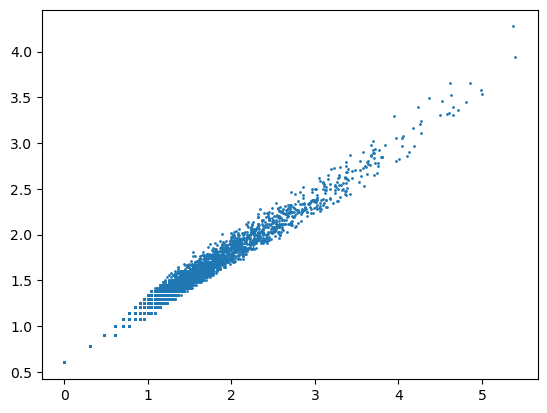

In [52]:
#We know the data plots linearly in log-log space
#First we take the logarithm of both the areas and perimeters

log_area = log10(area)
log_perimeter = log10(perimeter)

#Because we have already taken the logarithms, we can plot these in linear space
#to prove to ourselves that they still form a line.
#This step is not necessary:
scatter(log_area, log_perimeter, s = 1)
show()

In [53]:
#The Python library SciPy has a function that will calculate the slope and y-intercept for us.
#We need to import the function from SciPy
from scipy.stats import linregress

m, b, rval, pval, se = linregress(log_area, log_perimeter)

print("slope = ", m)
print("y-intercept = ", b)

slope =  0.6116478012133792
y-intercept =  0.6031779515672737


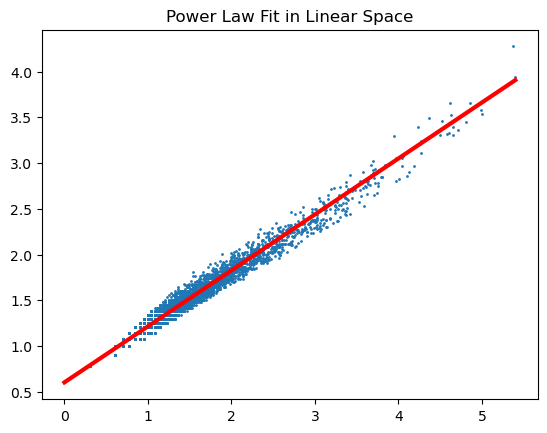

In [54]:
#Now that we know the slope and y-intercept, we can easily plot a line over the data using 
#equation for a line, y = mx+b

scatter(log_area, log_perimeter, s = 1)

#To plot the line, we need to create values for areas to plot the line
xlog = linspace(min(log_area), max(log_area), 100)

plot(xlog, m*xlog+b, c = 'r', linewidth = 3)
title('Power Law Fit in Linear Space')
show()

#### Method 2: The previous method worked properly, but the problem is the axes of our data are the logarithms of area and perimeter. It is better to scale the axes logarithmically (like the plot titled "Perimeter-Area Scaling on Logarithmic Axes") and fit the curve to those points. To do this, we need to remember the equation for our power law. $y=10^bx^m$

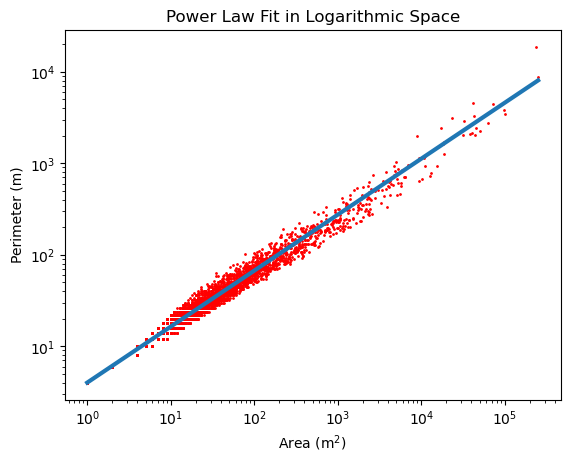

In [56]:
#First, let's make the plot of the data itself using the loglog() function
loglog(area, perimeter, 'o', markersize=1, color = 'r')

#Now let's create the "line" in logarithmic space

#First, create some x-values in the same range as our data
x = linspace(min(area), max(area), 10)

loglog(x, 10**b*x**m, linewidth = 3)
xlabel('Area (m$^2$)')
ylabel('Perimeter (m)')
title('Power Law Fit in Logarithmic Space')
show()